# <center> AND gate </center>

| x | y | x AND y|
|:-:|:-:|:------:|
| 0 | 0 | 0 |
| 1 | 0 | 0 |
| 0 | 1 | 0 |
| 1 | 1 | 1 |

## Neural Network Scratch

<img src="images/and.png" width = "50%">

* Hypothesis = logistic function: $h(x) = \frac{1}{1 + e^{-w^Tx}}$
* Intuition: $w_0 < 0$, $w_0 + w_1 < 0$, $w_0 + w_2 < 0$, $w_0 + w_1 + w_2 > 0$

## Check intuition

In [136]:
from math import exp

### BY HAND WEIGHTS ###

w0 = -300
w1 = 200
w2 = 200

### LOGISTIC FUNCTION ###

def h(x1, x2):
    return 1 / (1 + exp(-w0 - w1 * x1 - w2 * x2))

### TRAINING SET ###

X = [[0,0], [0,1], [1,0], [1,1]] # input
Y = [0, 0, 0, 1]                 # expected output

### TEST ###

for x in X: print '%d AND %d = %f' % (x[0], x[1], h(x[0], x[1]))

0 AND 0 = 0.000000
0 AND 1 = 0.000000
1 AND 0 = 0.000000
1 AND 1 = 1.000000


## Build network in Theano

In [137]:
### IMPORTS ###

import theano
import theano.tensor as T
import theano.tensor.nnet as nnet
import numpy

rng = numpy.random # random number generator

### SETTINGS ###

nTrainSteps = 1000 # number of training steps

alpha = 1.0 # learning rate

### SYMBOLIC VARIABLES ###

x = T.vector('x') # input
y = T.scalar('y') # expected value

w = theano.shared(rng.randn(2), name = 'w') # 2 weights initialized randomly
b = theano.shared(rng.randn(), name = 'b')  # bias term (w_0)

### EXPRESSION GRAPH ###

layer1 = nnet.sigmoid(T.dot(x,w) + b) # input layer
layer2 = T.sum(layer1)                # output layer
cost = (layer2 - y)**2                # cost function
gw, gb = T.grad(cost, [w,b])          # gradients

### COMPILE ###

train = theano.function(inputs = [x,y],
                        outputs = cost,
                        updates = ((w, w - alpha * gw), (b, b - alpha * gb)))

predict = theano.function(inputs=[x], outputs=layer2)

### TRAIN ###

costs   = [] # value of cost function in each training step
weights = [] # value of weights in each training step
bias    = [] # value of bias term in each training step

for i in range (nTrainSteps):
    # train net using each element from X
    for j in range(4): c = train(X[j], Y[j])
    # save progress to plot them later
    costs.append(train(X[j], Y[j]))
    weights.append(w.get_value())
    bias.append(b.get_value())

## Plot results

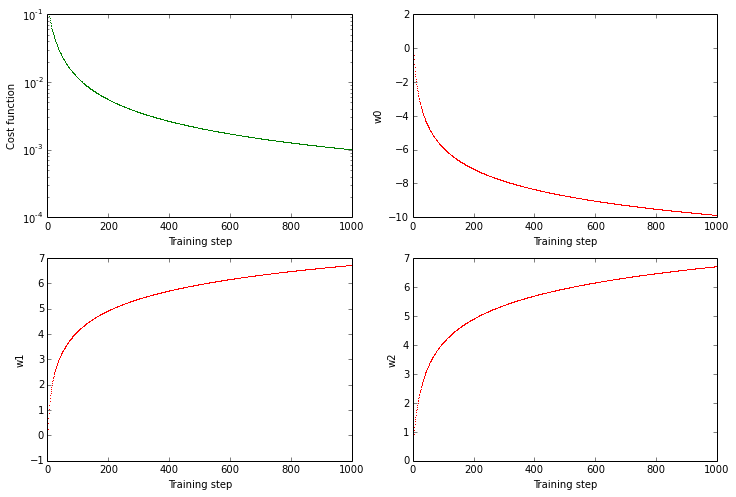

In [138]:
%matplotlib inline

import matplotlib.pyplot as plt

### PLOT RESULTS ###

fig, plots = plt.subplots(2,2) # create a 2x2 grid of plots
fig.set_size_inches((2, 2) * fig.get_size_inches()) # double size of figure

steps = [] # just ints from 0 to nTrainStep
steps.extend(range(0,nTrainSteps))

### PLOT COST FUNCTION ###

plots[0][0].set_xlabel('Training step')
plots[0][0].set_ylabel('Cost function')

plots[0][0].set_ylim([0.0001, 0.1])
plots[0][0].set_yscale('log')
plots[0][0].plot(steps, costs, 'g,')

### PLOT BIAS TERM ###

plots[0][1].set_xlabel('Training step')
plots[0][1].set_ylabel('w0')
plots[0][1].plot(steps, bias, 'r,')

### PLOT WEIGHTS ###

w1 = [w[0] for w in weights]
w2 = [w[1] for w in weights]

plots[1][0].set_xlabel('Training step')
plots[1][0].set_ylabel('w1')
plots[1][0].plot(steps, w1, 'r,')

plots[1][1].set_xlabel('Training step')
plots[1][1].set_ylabel('w2')
plots[1][1].plot(steps, w2, 'r,')

plt.show()

## Test

In [139]:
### TEST ###        

for x in X: print '%d AND %d = %f' % (x[0], x[1], predict(x))

0 AND 0 = 0.000049
0 AND 1 = 0.037579
1 AND 0 = 0.037703
1 AND 1 = 0.968906
